<a href="https://colab.research.google.com/github/s-thandri/labelflipping/blob/main/german_credit_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
#Imports some of the libraries that we will be using
import pandas as pd
import numpy as np
import math
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


#Parity and Model Building Functions

In [2]:
#This function is being used to calculate the statistical parity of the data set
#test_data: The original data frame containing the test data
#predictors: List of the all the column names AKA IV's
#prediction_df: Contains the predicitons made by the DT model
#sensitive_attr: Name of the sensitive attr
#sensitive_attr_cutoff: Cut off value for sensitive attr
#concat_col: Name of column I am creating new dataframe on
def s_parity(test_data, predictors, prediction_df, sensitive_attr, sensitive_attr_cutoff, concat_col):
    #Creating a new DF that contains all the datapoints from the test data and the predictions made from LR model
    #Concat_col: credit_risk_12
    test_demo_df = pd.DataFrame(test_data, columns = predictors)
    predicted_df = pd.DataFrame(prediction_df, columns = [concat_col])
    concat_df = pd.concat([test_demo_df,predicted_df], axis=1)

    #Get the two groups of people totals
    total_unpriv = (len(concat_df[concat_df[sensitive_attr]<sensitive_attr_cutoff]))
    total_priv = (len(concat_df[concat_df[sensitive_attr]>=sensitive_attr_cutoff]))

    #Number of people accepted
    total_credit_unpriv = len(concat_df[(concat_df[concat_col] == 1) & (concat_df[sensitive_attr] < sensitive_attr_cutoff)])
    total_credit_priv = len(concat_df[(concat_df[concat_col] == 1) & (concat_df[sensitive_attr] >= sensitive_attr_cutoff)])

    #Percentage of approved people
    p_unpriv = total_credit_unpriv/total_unpriv
    p_priv = total_credit_priv/total_priv


    #Calculate the parity
    parity = p_priv - p_unpriv


    return parity

In [3]:
#Make changes to make more efficient
#Function used to run the DT model
#train_dataset: Training dataset to train the model
#independent_var: Column names
#dependent_var: Prediction column name
#concat_col: Name of column creating new DF on
def logistic_regression(train_dataset, independent_var, dependent_var, concat_col):
        #Split the data up into train and test values and then run the DT model
        #These steps aren't neccessary to consistenly do over and over again
        x = train_dataset[independent_var].values
        y = train_dataset[dependent_var].values
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=310)
        clf = LogisticRegression(class_weight=None, max_iter=100)
        log = clf.fit(x_train,y_train)
        prediction = log.predict(x_test)

        #Printing the Overall accuracy of the model after one run
        #F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
        #file.write(f'\nAccuracy of the model on Testing Sample Data: {F1_Score}')

        #Prints out the average across all ten run throughs
        #Accuracy_Values=cross_val_score(log, x , y, cv=10, scoring='f1_weighted')

        accuracy = accuracy_score(y_test,prediction)*100

        #After running the model I return a df with the datapoints and the labels
        test_demo_df = pd.DataFrame(x_test, columns = independent_var)
        #Concat_col: credit_risk_12
        predicted_df = pd.DataFrame(prediction, columns = [concat_col])

        return accuracy, test_demo_df, predicted_df

#Building Original Logistic Regression Model

In [4]:
#Defining the columns and creating the Dataframe with all 1000 datapoints
columns = ["checking_account_status", "duration", "credit_history", "purpose", "credit_amount", "savings_account_status", "employment_status", "installment_rate", "personal_status", "other_debtors", "residence_since", "property", "age", "other_installment_plans", "housing", "existing_credits", "job", "num_dependents", "telephone", "foreign_worker", "credit_risk"]
german_df = pd.read_table('german.data', header = None, delim_whitespace=True, names = columns)

In [5]:
#Encode all the non-numeric columns with dummies
encoded_data=pd.get_dummies(german_df,columns=['checking_account_status','credit_history','savings_account_status','employment_status','personal_status','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker','purpose'], drop_first=True)

In [6]:
encoded_data

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents,credit_risk,checking_account_status_A12,checking_account_status_A13,...,foreign_worker_A202,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49
0,6,1169,4,4,67,2,1,1,False,False,...,False,False,False,False,True,False,False,False,False,False
1,48,5951,2,2,22,1,1,2,True,False,...,False,False,False,False,True,False,False,False,False,False
2,12,2096,2,3,49,1,2,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,42,7882,2,4,45,1,2,1,False,False,...,False,False,False,True,False,False,False,False,False,False
4,24,4870,3,4,53,2,2,2,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,False,False,...,False,False,False,True,False,False,False,False,False,False
996,30,3857,4,4,40,1,1,1,False,False,...,False,True,False,False,False,False,False,False,False,False
997,12,804,4,4,38,1,1,1,False,False,...,False,False,False,False,True,False,False,False,False,False
998,45,1845,4,4,23,1,1,2,False,False,...,False,False,False,False,True,False,False,False,False,False


In [7]:
#Initialize all the different columns including predictors and target variable
encoded_data.columns
target_var = 'credit_risk'
predictors = ['duration', 'credit_amount', 'installment_rate',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'checking_account_status_A12',
       'checking_account_status_A13', 'checking_account_status_A14',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'savings_account_status_A62',
       'savings_account_status_A63', 'savings_account_status_A64',
       'savings_account_status_A65', 'employment_status_A72',
       'employment_status_A73', 'employment_status_A74',
       'employment_status_A75', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'other_debtors_A102', 'other_debtors_A103',
       'property_A122', 'property_A123', 'property_A124',
       'other_installment_plans_A142', 'other_installment_plans_A143',
       'housing_A152', 'housing_A153', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A192', 'foreign_worker_A202']


In [8]:
#Setting the columns to each part of the logistic regression
#x conatins the IV's
#y contains the DV
x = encoded_data[predictors].values
y = encoded_data[target_var].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=310)
#X-train is all the data points for training
#y_train contains the labels for each of the training data points
#x_test contains all the testing data points
#y_test contains the ground truth for each of the test data points

In [10]:
#Run the LR classifier
clf = LogisticRegression(class_weight=None, max_iter=100)
dt = clf.fit(x_train,y_train)
prediction = dt.predict(x_test)
prediction_prob = dt.predict_proba(x_train)
accuracy = accuracy_score(y_test,prediction)*100
print(accuracy)

77.5


In [11]:
#Break the test dataframe into different groups
#Unprotected group is everyone <45
#Complement group is everyone >= 45
test_demo_df = pd.DataFrame(x_test, columns = predictors)
predicted_df = pd.DataFrame(prediction, columns = ['credit_risk_12'])
concat_df = pd.concat([test_demo_df,predicted_df], axis=1)

#Get the two groups of people totals
total_unpriv = (len(concat_df[concat_df['age']<45]))
total_priv = (len(concat_df[concat_df['age']>=45]))

#Number of people accepted
total_credit_unpriv = len(concat_df[(concat_df['credit_risk_12'] == 1) & (concat_df['age'] < 45)])
total_credit_priv = len(concat_df[(concat_df['credit_risk_12'] == 1) & (concat_df['age'] >= 45)])

#Percentage of approved people
p_unpriv = total_credit_unpriv/total_unpriv
p_priv = total_credit_priv/total_priv

statistical_parity = p_priv - p_unpriv
print(f'Statistical Parity: {statistical_parity:.5f}')

Statistical Parity: -0.09375


#Iterative Flipping

In [12]:
#Combine x_train and y_train
#I combine these so that when I flip the labels I have one DF that I work with
#Rather than 2 numpy.ndarrays
train_demo_df = pd.DataFrame(x_train, columns = predictors)
train_outcome_df = pd.DataFrame(y_train, columns = ['credit_risk'])
train_full_df = pd.concat([train_demo_df, train_outcome_df], axis=1)

In [13]:
#When flipping the label make sure convert the flip before into its original value

#Combine x_train and y_train
#Retrain the model after combining them and then flip and calculate
#Implement label flipping and recalculate

#Each list holds a different value

#list_parity holds each parity value after each flip and recalculation
list_parity = []
#list_acc holds the accuracy of each iteration after a flip
list_acc = []
#list_flip holds the row number of the flip; starts at 0 and goes through the whole
list_flip = []

#Iterating through the training dataset
for index, row in train_full_df.iterrows():
  #If the row that I am on has the label 1 (credit_risk is the label name) then I will flip it
  #And then run the logistic_regression function to get the accuracy, the DF that contains datapoints,
  #And the DF that contains the predictions
  #The two DF's are then combined in the s_parity function to calculate parity
    if row['credit_risk'] == 1:
      #Flip the label
        train_full_df.at[index, 'credit_risk'] = 2

        #Run the logistic regression function
        #train_full_df: training dataset
        #predictors: IV's
        #target_var: DV's
        #'credit_risk12': this is the column that the labels for the test_prediction is in
        accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df, predictors, target_var, 'credit_risk_12')

        #list_flip: contains the row number that has just been flipped
        #list_num: contains the accuracy value just calculated
        list_flip.append(index)
        list_acc.append(accuracy)

        ##################################################################################
        #After calculating the accuracy parity calculation is next
        parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
        #list_parity: contains the parity value after the flip
        #print(parity)
        list_parity.append(parity)

        #Flips the label back to its original value
        train_full_df.at[index,'credit_risk'] = 1

    #Repeats all the same steps as above but this time if the original label is 2
    elif row['credit_risk'] == 2:
        train_full_df.at[index, 'credit_risk'] = 1

        accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df, predictors, target_var, 'credit_risk_12')
        list_flip.append(index)
        list_acc.append(accuracy)

        ##################################################################################
        parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
        #print(parity)
        list_parity.append(parity)

        train_full_df.at[index,'credit_risk'] = 2

In [14]:
#parity_difference: Contains the difference between flipped and original value
parity_difference = []
#Contains parity values that fall between .03 and -.03
large_influence = []
#Contains the row number of each flip
li_row = []

#Takes each of the parity values after flipping and compares it to the original parity value
#Appends the difference to a new list
for value in list_parity:
    difference = abs(value) - abs(statistical_parity)
    parity_difference.append(difference)


#Rows are considered to be high influence if they fall in between
for index, item in enumerate(parity_difference):
  if statistical_parity > 0:
    if item <= statistical_parity or item >= -1*(statistical_parity):
        large_influence.append(item)
        li_row.append(index)
  else:
    if item >= statistical_parity or item <= -1*(statistical_parity):
        large_influence.append(item)
        li_row.append(index)


In [15]:
# Combine lists into tuples and zip them
combined_data = list(zip(large_influence, li_row))

# Sort based on statistical parity values in descending order
combined_data.sort(key=lambda x: abs(x[0]), reverse=True)

# Extract sorted indices list and the sorted values
sorted_indices_list = [index for _, index in combined_data]
sorted_values = sorted(large_influence, reverse=True)

In [16]:
#Ranking the values that have been appended to the large_influence list
#zip_lists = list(zip(large_influence, li_row))

#Sort the list of tuples based on the absolute value of the values
#sorted_pairs = sorted(zip_lists, key=lambda pair: pair[0], reverse=True)

#Separate the sorted values and indices back into separate lists
#sorted_values, sorted_indices = zip(*sorted_pairs)

In [17]:
#After ranking the values it is time to now go back through the flipping process but flip the top 500 labels based on their ranking
#Parity values after each flip
ranked_parity = []
#Accuracy after every flip
ranked_acc = []
#Index/row of the flip
ranked_flip = []

row_num = 0
#sorted_indices is a tuple so it's coverted to a list
ranked_indices_list = list(sorted_indices_list)

#Iterate through the ranked indices and start flipping labels based on their position in the list
for row in range(len(ranked_indices_list)):
  #row_num: contains the row number with respect to the dataframe
  row_num = ranked_indices_list[row]
  #If the label at the specific row is 1 it flips it to 2 then calculates the parity and accuracy
  #It follows the same steps as the flipping before
  if train_full_df.at[row_num,'credit_risk'] == 1:
      train_full_df.at[row_num, 'credit_risk'] = 2

      accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df, predictors, target_var, 'credit_risk_12')

      ranked_flip.append(row_num)
      ranked_acc.append(accuracy)

      ##################################################################################
      parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
      ranked_parity.append(parity)

      #train_full_df.at[index,'credit_risk'] = 1

  elif train_full_df.at[row_num,'credit_risk'] == 2:
      train_full_df.at[row_num, 'credit_risk'] = 1

      accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df, predictors, target_var, 'credit_risk_12')

      ranked_flip.append(row_num)
      ranked_acc.append(accuracy)

      ##################################################################################
      parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
      ranked_parity.append(parity)

      #train_full_df.at[index,'credit_risk'] = 2




In [18]:
#Takes the first 150 parity values and their indices and will graph those
top_ranked_parity = ranked_parity[:150]
top_ranked_index = ranked_flip[:150]

In [19]:
#Place the original parity at the beginning of the list
top_ranked_parity.insert(0,statistical_parity)

#Uncertainty Reduction/Entropy

In [20]:
#Create new training dataset
train_demo_df_entropy = pd.DataFrame(x_train, columns = predictors)
train_outcome_df_entropy = pd.DataFrame(y_train, columns = ['credit_risk'])
train_full_df_entropy = pd.concat([train_demo_df, train_outcome_df], axis=1)

In [21]:
# Obtain predicted probabilities on the training data
predicted_probabilities = dt.predict_proba(x_train)

In [22]:
#Log base two would be: log = math.log(x,2)
#Entropy equation would then be: -1*(p1((math.log(p1,2))+p2*(math.log(p2,2)))

#In the predicted_probabilities: first value is 1 (which is good), second value is 2(which is bad)

#Loop through the predicted_probabilities array and calculate values
#One list will contain the index of each row in the table and the other will contain the entropy value of each row

index_list = []
entropy_list = []

for index, value in enumerate(predicted_probabilities):
  #Calculate p1 and p2
  p1=predicted_probabilities[index,0]
  p2=predicted_probabilities[index,1]
  #Calculate entropy in 3 steps
  entropy_calc1 = p1 * math.log(p1,2)
  entropy_calc2 = p2 * math.log(p2,2)
  entropy_final = -1 * (entropy_calc1 + entropy_calc2)

  #Append the values to their respective lists
  index_list.append(index)
  entropy_list.append(entropy_final)

In [23]:
#Rank the entropy values in decreasing order
#Match the index list with them

#Combine the two lists using zip
combined_list = list(zip(entropy_list, index_list))

#Sort the combined lust based on entropy values in descending order
sorted_list = sorted(combined_list, key = lambda x: x[0], reverse=True)

#Extract the values
sorted_ent_list, sorted_index_list = zip(*sorted_list)

In [24]:
train_full_df_entropy['credit_risk'] = train_full_df_entropy['credit_risk'].astype('int')

In [25]:
#Convert each of the tuples into lists
ranked_indices_list = list(sorted_index_list)
ranked_entropy_list = list(sorted_ent_list)

#Get the top 500 points in the list
top_index_points = ranked_indices_list[:500]
top_entropy_list = ranked_entropy_list[:500]

In [26]:
#After ranking and getting the tope 500 points I flip them based on where they are in the list

#Different lists to hold each of the values
ranked_parity = [statistical_parity]
ranked_acc = []
ranked_flip = []

row_num = 0

#Go through the training dataset and flip the points based on their entropy levels
for row in range(len(sorted_index_list)):
  row_num = ranked_indices_list[row]

  if train_full_df_entropy.at[row_num,'credit_risk'] == 1:
    train_full_df_entropy.at[row_num,'credit_risk'] = 2
    accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df_entropy, predictors, target_var, 'credit_risk_12')

    ranked_flip.append(row_num)
    ranked_acc.append(accuracy)

    parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
    ranked_parity.append(parity)

  elif train_full_df_entropy.at[row_num, 'credit_risk'] == 2:
    train_full_df_entropy.at[row_num,'credit_risk'] = 1
    accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df_entropy, predictors, target_var, 'credit_risk_12')

    ranked_flip.append(row_num)
    ranked_acc.append(accuracy)

    parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
    ranked_parity.append(parity)


#Maximum Expected Utility

In [27]:
#Create a fresh training dataset
train_demo_df_MEU = pd.DataFrame(x_train, columns = predictors)
train_outcome_df_MEU = pd.DataFrame(y_train, columns = ['credit_risk'])
train_full_df_MEU = pd.concat([train_demo_df, train_outcome_df], axis=1)

In [28]:
# Obtain predicted probabilities on the training data
predicted_probabilities = dt.predict_proba(x_train)

In [29]:
#Make a copy of the original training dataframe to make changes on
copy_train_full_df = train_full_df_MEU.copy()

In [30]:
#Grab the original label of the DP in the copy dataframe and store in lists along with the index
label = []
row_index = []
for index, row in copy_train_full_df.iterrows():
  label.append(copy_train_full_df.at[index,'credit_risk'])
  row_index.append(index)

In [31]:
#Calculate the first part of the MEU equation
MEU_part1_list = []
for index, value in enumerate(label):
  if value == 1:
    prob1 = predicted_probabilities[index,0]
    MEU_part1_calc = prob1 * statistical_parity
    MEU_part1_list.append(MEU_part1_calc)
  elif value == 2:
    prob2 = predicted_probabilities[index,1]
    MEU_part1_calc = prob2 * statistical_parity
    MEU_part1_list.append(MEU_part1_calc)

In [32]:
#Iterate through the copied dataset
#Flip each label and calculate the parity

#When flipping the label make sure convert the flip before into its original value

#Each list holds a different value

#list_parity holds each parity value after each flip and recalculation
MEU_part2_list_parity = []
#list_acc holds the accuracy of each iteration after a flip
MEU_part2_list_acc = []
#list_flip holds the row number of the flip; starts at 0 and goes through the whole
MEU_part2_list_flip = []

#Iterating through the training dataset
for index, row in copy_train_full_df.iterrows():
  #If the row that I am on has the label 1 (credit_risk is the label name) then I will flip it
  #And then run the logistic_regression function to get the accuracy, the DF that contains datapoints,
  #And the DF that contains the predictions
  #The two DF's are then combined in the s_parity function to calculate parity
    if row['credit_risk'] == 1:
      #Flip the label
        copy_train_full_df.at[index, 'credit_risk'] = 2

        #Run the logistic regression function
        #train_full_df: training dataset
        #predictors: IV's
        #target_var: DV's
        #'credit_risk12': this is the column that the labels for the test_prediction is in
        accuracy,test_datapoints, test_prediction = logistic_regression(copy_train_full_df, predictors, target_var, 'credit_risk_12')

        #list_flip: contains the row number that has just been flipped
        #list_num: contains the accuracy value just calculated
        MEU_part2_list_flip.append(index)
        MEU_part2_list_acc.append(accuracy)

        ##################################################################################
        #After calculating the accuracy parity calculation is next
        parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
        #list_parity: contains the parity value after the flip
        MEU_part2_list_parity.append(parity)

        #Flips the label back to its original value
        copy_train_full_df.at[index,'credit_risk'] = 1

    #Repeats all the same steps as above but this time if the original label is 2
    elif row['credit_risk'] == 2:
        copy_train_full_df.at[index, 'credit_risk'] = 1

        accuracy,test_datapoints, test_prediction = logistic_regression(copy_train_full_df, predictors, target_var, 'credit_risk_12')
        MEU_part2_list_flip.append(index)
        MEU_part2_list_acc.append(accuracy)

        ##################################################################################
        parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
        MEU_part2_list_parity.append(parity)

        copy_train_full_df.at[index,'credit_risk'] = 2

In [33]:
#Second part of the calculation by taking the opposite value
MEU_part2_list = []
for index, value in enumerate(label):
  if value == 1:
    prob1 = predicted_probabilities[index,1]
    MEU_part2_calc = prob1 * MEU_part2_list_parity[index]
    MEU_part2_list.append(MEU_part2_calc)
  elif value == 2:
    prob2 = predicted_probabilities[index,0]
    MEU_part2_calc = prob2 * MEU_part2_list_parity[index]
    MEU_part2_list.append(MEU_part2_calc)

In [34]:
#Add the two lists together
expected_utility_values = []
for part1, part2 in zip(MEU_part1_list, MEU_part2_list):
    expected_utility_values.append(part1 + part2)

In [35]:
#After adding the two lists together I need do the following calculation:
#EU - OG Parity = New ranked value to flip on
new_ranked_value = []

for value in expected_utility_values:
  new_ranked_value.append(value - statistical_parity)


In [36]:
#Flip the lists so that they are in increasing order
#Rank the MEUvalues in Increasing order
#Match the index list with them

#Combine the two lists using zip
combined_list = list(zip(new_ranked_value, row_index))

#Sort the combined lust based on EU values in increasing order
sorted_list = sorted(combined_list, key = lambda x: abs(x[0]), reverse = True)

#Extract the values
sorted_eu_list, sorted_index_list = zip(*sorted_list)

In [37]:
#After ranking and getting the tope 500 points I flip them based on where they are in the list

#Different lists to hold each of the values
MEU_ranked_parity = [statistical_parity]
MEU_ranked_acc = []
MEU_ranked_flip = []

row_num = 0

#Go through the training dataset and flip the points based on their entropy levels
for row in range(len(sorted_index_list)):
  row_num = sorted_index_list[row]

  if train_full_df_MEU.at[row_num,'credit_risk'] == 1:
    train_full_df_MEU.at[row_num,'credit_risk'] = 2
    accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df_MEU, predictors, target_var, 'credit_risk_12')

    MEU_ranked_flip.append(row_num)
    MEU_ranked_acc.append(accuracy)

    parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
    MEU_ranked_parity.append(parity)

  elif train_full_df_MEU.at[row_num, 'credit_risk'] == 2:
    train_full_df_MEU.at[row_num,'credit_risk'] = 1
    accuracy,test_datapoints, test_prediction = logistic_regression(train_full_df_MEU, predictors, target_var, 'credit_risk_12')

    MEU_ranked_flip.append(row_num)
    MEU_ranked_acc.append(accuracy)

    parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
    MEU_ranked_parity.append(parity)




In [38]:
#Convert each of the tuples into lists
ranked_indices_list = list(sorted_index_list)
ranked_eu_list = list(MEU_ranked_parity)

#Get the top 500 points in the list
top_index_points = ranked_indices_list[:500]
top_eu_list = ranked_eu_list[:500]

#Random Flipping

In [39]:
#Create a new dataframe with the original data for the random flipping
train_demo_df_random = pd.DataFrame(x_train, columns = predictors)
train_outcome_df_random = pd.DataFrame(y_train, columns = ['credit_risk'])
train_full_df_random = pd.concat([train_demo_df, train_outcome_df], axis=1)

In [40]:
#Randomized flipping
#Budget of 50
import random

random_list_flip = []
random_list_acc = []
random_list_parity = []

col_name = 'credit_risk'
budget = 200

#Loops through the budget and will randomly change rows in the dataframe based on the random library
#After changing the row it will calculate the accuracy and parity and then change the value back to its original value
#Follows the same flipping and calculations as before but this time it is with random rows rather than systematic flipping
for iter in range(budget):
    random_row = random.choice(train_full_df_random.index)
    if train_full_df_random.at[random_row,col_name] == 1:
        train_full_df_random.at[random_row,col_name] = 2

        accuracy, test_datapoints, test_prediction = logistic_regression(train_full_df_random, predictors, target_var,'credit_risk_12')

        random_list_flip.append(iter)
        random_list_acc.append(accuracy)

        ##################################################################################
        parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
        random_list_parity.append(parity)

        #train_full_df.at[random_row,col_name] = 1

    elif train_full_df_random.at[random_row,col_name] == 2:
        train_full_df_random.at[random_row,col_name] = 1

        accuracy, test_datapoints, test_prediction = logistic_regression(train_full_df_random, predictors, target_var,'credit_risk_12')
        random_list_flip.append(iter)
        random_list_acc.append(accuracy)

        ##################################################################################
        parity = s_parity(test_datapoints, predictors, test_prediction, 'age', 45, 'credit_risk_12')
        random_list_parity.append(parity)

        #train_full_df.at[random_row,col_name] = 2




In [41]:
#Getting the top 150 accuracy values
top_ranked_acc = ranked_acc[:200]
top_ranked_noABS_index = ranked_flip[:200]

#Graphing The Solutions

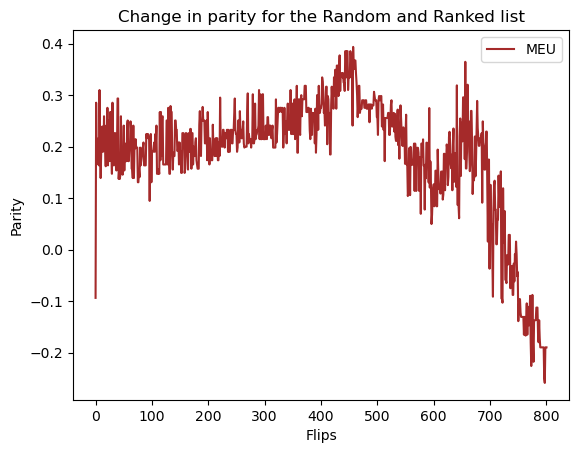

In [42]:
#Plotting the random flips dataset and the systematic flips
#Systematic flips will have 800
#Random will have 150

#Plot the first dataset which is the ranked data list with 800 flips
#list_parity.sort(reverse=True)
x=range(len(list_parity))
#plt.plot(x,list_parity,label='Ranked List',color='blue')

#Plot the second dataset which is the random list of 150 flips
x2 = range(len(random_list_parity))
#plt.plot(x2,random_list_parity,label='Random List',color='red')

#Entropy based flips
x3 = range(len(ranked_parity))
#plt.plot(x3,ranked_parity,label='Uncertainty Reduction',color='black')

#MEU based flips
x4 = range(len(MEU_ranked_parity))
plt.plot(x4,MEU_ranked_parity,label='MEU',color='brown')

#Add the labels
plt.xlabel('Flips')
plt.ylabel('Parity')
plt.title('Change in parity for the Random and Ranked list')

#Add a legend
plt.legend()

#Show the plot
plt.show()

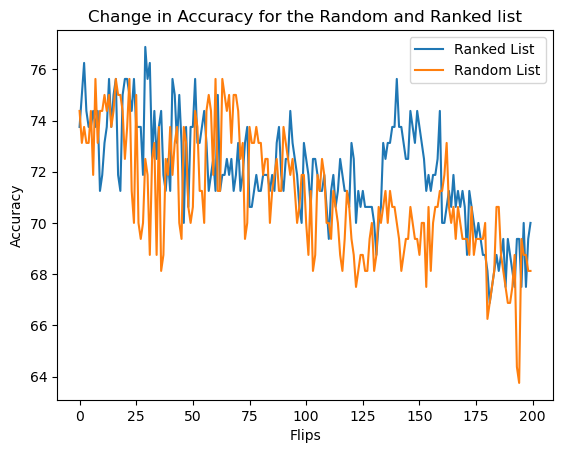

In [43]:
#Plotting the random flips dataset and the systematic flips
#Systematic flips will have 800
#Random will have 150
#This is comparing the two accuracies

#Plot the first dataset which is the ranked data list with 800 flips
#list_parity.sort(reverse=True)
x=range(len(top_ranked_acc))
plt.plot(x,top_ranked_acc,label='Ranked List')

#Plot the second dataset which is the random list of 150 flips
x2 = range(len(random_list_acc))
plt.plot(x2,random_list_acc,label='Random List')

#Add the labels
plt.xlabel('Flips')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy for the Random and Ranked list')

#Add a legend
plt.legend()

#Show the plot
plt.show()


In [44]:
#Check to see which parity values are less than the original value based on the magnitude
similar_values_df = pd.DataFrame(columns=columns)
similar_values_encoded_data=pd.get_dummies(similar_values_df,columns=['checking_account_status','credit_history','savings_account_status','employment_status','personal_status','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker','purpose'], drop_first=True)
for value in range(len(ranked_parity)):
    if abs(ranked_parity[value]) < abs(statistical_parity):
        row = train_full_df.iloc[ranked_flip[value]]
        similar_values_encoded_data = similar_values_encoded_data.append(row, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
#Get the original data from the german dataframe to see what the original labels are
check_labels = pd.DataFrame(columns=columns)
for value in range(len(ranked_parity)):
    if abs(ranked_parity[value]) < abs(statistical_parity):
        index = ranked_flip[value]
        check_labels = check_labels.append(german_df.loc[index])